In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

db_url = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'

engine = create_engine(db_url)

dsbc_df = pd.read_sql_query('SELECT * FROM useducation;', con=engine)

# close the db connetion
engine.dispose()

In [3]:
dsbc_df2 = dsbc_df.copy()
print(dsbc_df.isnull().sum()*100/dsbc_df.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [11]:
for col in dsbc_df2.columns:
    dsbc_df2[col].interpolate(inplace=True, limit_direction='both')

In [13]:
print(dsbc_df2.isnull().sum()*100/dsbc_df2.isnull().count())

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64


### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [14]:
dsbc_df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.838759e+05,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,4.889553e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.264844
std,7.393983,1.006773e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.241104e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.978430
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.821195e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.125620e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.487961
50%,2004.000000,7.373935e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.301260e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.615528
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.308385e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.847503
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [15]:
dsbc_df2.STATE

0             ALABAMA
1              ALASKA
2             ARIZONA
3            ARKANSAS
4          CALIFORNIA
            ...      
1487         VIRGINIA
1488       WASHINGTON
1489    WEST_VIRGINIA
1490        WISCONSIN
1491          WYOMING
Name: STATE, Length: 1492, dtype: object

In [29]:
ca_df = dsbc_df2.loc[dsbc_df2.STATE == 'CALIFORNIA']
ca_df.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1101,2013_CALIFORNIA,CALIFORNIA,2013,6208733.0,68868516.0,7836263.0,35141208.0,25891045.0,69727119.0,34194878.0,...,470515.0,472381.000000,498403.00000,3.771067e+06,1.952314e+06,5.799332e+06,233.654465,275.901351,212.545968,260.448287
1152,2014_CALIFORNIA,CALIFORNIA,2014,6224685.0,72389126.0,7415061.0,38410554.0,26563511.0,72506810.0,35539425.0,...,475192.0,467038.000000,496901.00000,3.767745e+06,1.949755e+06,5.794141e+06,245.027691,286.045693,225.002832,271.746115
1203,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.000000,492835.00000,3.748465e+06,1.941009e+06,6.444280e+05,231.549345,275.324573,212.677949,258.768268
1254,2016_CALIFORNIA,CALIFORNIA,2016,6217031.0,89217262.0,7709079.0,50904567.0,30603616.0,85320133.0,42587272.0,...,7426.0,6642.945946,5809.27027,5.817746e+04,2.523130e+04,8.411222e+04,246.505393,286.652911,227.998998,260.486843
1451,2017_CALIFORNIA,CALIFORNIA,2017,1595024.0,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1212.0,1103.000000,1024.00000,9.403000e+03,5.084000e+03,4.465080e+05,232.262941,276.638200,215.421814,262.520630


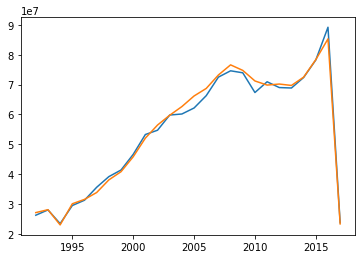

In [28]:
plt.plot(ca_df['YEAR'], ca_df['TOTAL_REVENUE'])
plt.plot(ca_df['YEAR'], ca_df['TOTAL_EXPENDITURE'])

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [31]:
ca_df.describe()
# average scores for math are higher

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,5.552806e+06,5.456717e+07,5.630601e+06,3.013500e+07,1.880158e+07,5.498265e+07,2.728161e+07,1.589567e+07,2.721574e+06,...,429183.653846,416755.344075,369270.471933,3.420285e+06,1.648790e+06,4.966081e+06,230.294833,274.192160,215.459040,262.464542
std,7.648529,1.487748e+06,1.970360e+07,2.713728e+06,1.087847e+07,6.603250e+06,2.000990e+07,9.114942e+06,5.810603e+06,9.955334e+05,...,127055.638117,127604.568804,133937.454167,1.012734e+06,5.265078e+05,1.729603e+06,10.545213,7.770221,7.953587,4.741709
min,1992.000000,8.971100e+04,2.344084e+07,1.680983e+06,9.277802e+06,7.641041e+06,2.301269e+07,1.224751e+07,6.754346e+06,2.491300e+04,...,1212.000000,1103.000000,1024.000000,9.403000e+03,5.084000e+03,8.411222e+04,208.398961,260.892247,196.764414,254.895247
25%,1998.250000,5.628683e+06,3.650696e+07,2.925390e+06,2.113067e+07,1.290412e+07,3.491863e+07,1.864130e+07,1.026507e+07,2.011035e+06,...,439180.000000,407993.000000,303400.500000,3.535187e+06,1.538946e+06,5.002436e+06,225.218587,268.589176,210.161463,259.627004
50%,2004.500000,6.202819e+06,5.998909e+07,6.214862e+06,3.268723e+07,2.025660e+07,6.119892e+07,2.959327e+07,1.718461e+07,3.021886e+06,...,466585.500000,465644.500000,390187.500000,3.749212e+06,1.830786e+06,5.751751e+06,230.994174,275.104883,216.452125,261.485620
75%,2010.750000,6.226545e+06,7.046910e+07,7.522644e+06,3.767445e+07,2.372405e+07,7.096830e+07,3.454927e+07,2.064027e+07,3.487798e+06,...,483432.750000,475867.500000,477916.250000,3.803901e+06,1.962145e+06,5.828984e+06,238.911072,279.725837,221.595204,265.263273
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.060362e+07,8.532013e+07,4.258727e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,246.505393,286.652911,227.998998,271.746115


### 4. What are the distributions of the math and reading scores in the sample?

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

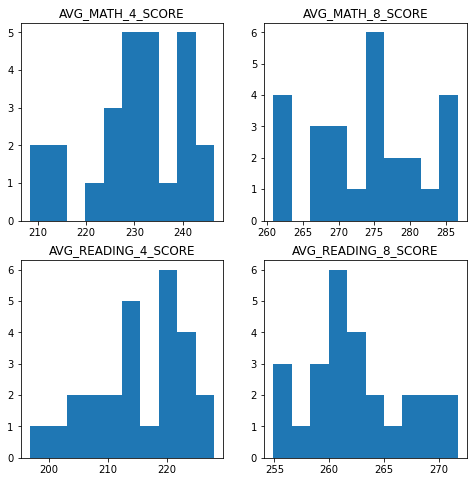

In [35]:
plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.hist(ca_df['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(ca_df['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(ca_df['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(ca_df['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

### 5. Now look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [36]:
ca_df_mean_fill = dsbc_df.copy()

In [37]:
ca_df_mean_fill = ca_df_mean_fill.loc[ca_df_mean_fill.STATE == 'CALIFORNIA']

In [41]:
fill_cols = ca_df_mean_fill.filter(like='AVG_').columns

In [47]:
for col in fill_cols:
    ca_df_mean_fill[col].fillna(ca_df_mean_fill[col].mean(), inplace=True)

In [49]:
ca_df_mean_fill.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,261.902652
56,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,225.659625,269.355244,207.911547,261.902652
108,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,3372294.0,1421547.0,4860291.0,225.659625,269.355244,207.911547,261.902652
161,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,3430751.0,1464841.0,4964774.0,225.659625,269.355244,207.911547,261.902652
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451


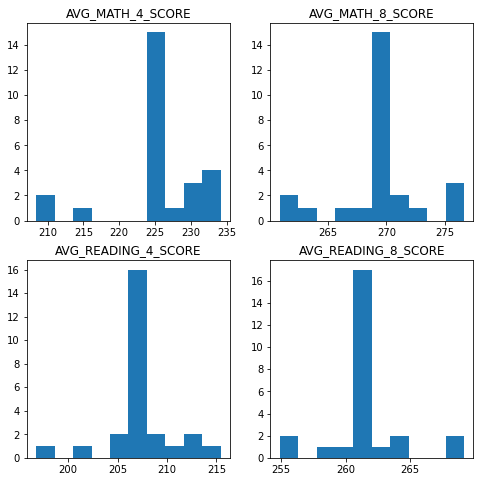

In [50]:
def plot_hist(df):
    plt.figure(figsize=[8,8])
    plt.subplot(2,2,1)
    plt.hist(df['AVG_MATH_4_SCORE'])
    plt.title('AVG_MATH_4_SCORE')

    plt.subplot(2,2,2)
    plt.hist(df['AVG_MATH_8_SCORE'])
    plt.title('AVG_MATH_8_SCORE')

    plt.subplot(2,2,3)
    plt.hist(df['AVG_READING_4_SCORE'])
    plt.title('AVG_READING_4_SCORE')

    plt.subplot(2,2,4)
    plt.hist(df['AVG_READING_8_SCORE'])
    plt.title('AVG_READING_8_SCORE')
    
plot_hist(ca_df_mean_fill)

In [51]:
ca_df_median_fill = dsbc_df.copy()
ca_df_median_fill = ca_df_median_fill.loc[ca_df_median_fill.STATE == 'CALIFORNIA']

for col in fill_cols:
    ca_df_median_fill[col].fillna(ca_df_median_fill[col].median(), inplace=True)

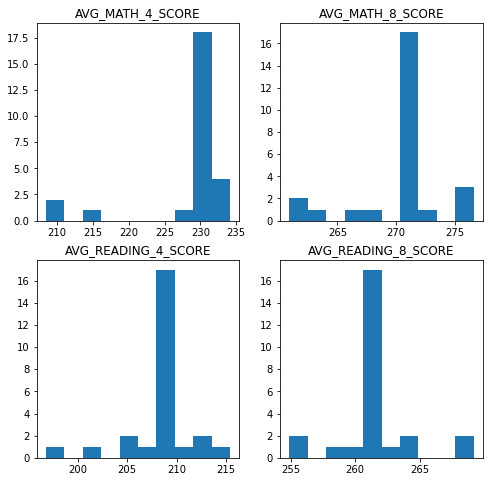

In [52]:
plot_hist(ca_df_median_fill)

<AxesSubplot:>

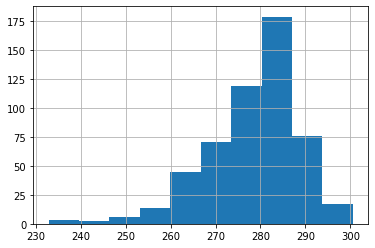

In [55]:
dsbc_df.dropna(subset=['AVG_MATH_8_SCORE'])['AVG_MATH_8_SCORE'].hist()